<h1>Содержание<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span>
    <a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span>
    <a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span>
    <a href="#Предобработка-данных-и-создание-итоговой-таблицы-с-признаками" data-toc-modified-id="Предобработка-данных-и-создание-итоговой-таблицы-с-признаками-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных и создание итоговой таблицы с признаками</a></span></li><li><span>
    <a href="#Создание-моделей,-их-анализ-и-выбор-наилучшей-модели" data-toc-modified-id="Создание-моделей,-их-анализ-и-выбор-наилучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Создание моделей, их анализ и выбор наилучшей модели</a></span></li><li><span>
    <a href="#Тестирование-наилучшей-модели" data-toc-modified-id="Тестирование-наилучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование наилучшей модели</a></span></li></ul></div>

# Выпускной проект "Промышленность"

## Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. 

Необходимо построить модель, которая предскажет температуру стали с метрикой МАЕ не более 6.8.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ок, это хороший тон - дать описание проблематики.</p>
</div>

## Анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import lightgbm as lgb
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

**Загрузка данных**

In [2]:
try:
    data_arc = pd.read_csv('final_steel/data_arc.csv')  # данные об электродах
    data_bulk = pd.read_csv('final_steel/data_bulk.csv')  # данные о подаче сыпучих материалов (объём)
    data_bulk_time = pd.read_csv('final_steel/data_bulk_time.csv')  # данные о подаче сыпучих материалов (время)
    data_gas = pd.read_csv('final_steel/data_gas.csv')  # данные о продувке сплава газом
    data_temp = pd.read_csv('final_steel/data_temp.csv')  # результаты измерения температуры
    data_wire = pd.read_csv('final_steel/data_wire.csv')  # данные о проволочных материалах (объём)
    data_wire_time = pd.read_csv('final_steel/data_wire_time.csv')  # данные о проволочных материалах (время)
    
except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')  # данные об электродах
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')  # данные о подаче сыпучих материалов (объём)
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')  # данные о подаче сыпучих материалов (время)
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')  # данные о продувке сплава газом
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')  # результаты измерения температуры
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')  # данные о проволочных материалах (объём)
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')  # данные о проволочных материалах (время)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, данные на базе)

**Вывод информации о данных**

In [3]:
data = ((data_arc, 'Данные об электродах'), 
        (data_bulk, 'Данные о подаче сыпучих материалов (объём)'), 
        (data_bulk_time, 'Данные о подаче сыпучих материалов (время)'), 
        (data_gas, 'Данные о продувке сплава газом'), 
        (data_temp, 'Результаты измерения температуры'), 
        (data_wire, 'Данные о проволочных материалах (объём)'), 
        (data_wire_time, 'Данные о проволочных материалах (время)'))

for d in data:
    print(d[1].upper())
    display(d[0].head())
    print()
    print(d[0].info(), end='\n\n')
    print('Всего строк:', d[0].shape[0], end='\n\n')
    print('Количество пропусков:', end='\n\n')
    print(d[0].isna().sum(), end='\n\n')
    print(f'Количество полных дубликатов: {d[0].duplicated().sum()}', end='\n\n')

ДАННЫЕ ОБ ЭЛЕКТРОДАХ


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None

Всего строк: 14876

Количество пропусков:

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

Количество полных дубликатов: 0

ДАННЫЕ О ПОДАЧЕ СЫПУЧИХ МАТЕРИАЛОВ (ОБЪЁМ)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None

Всего строк: 3129

Количество пропусков:

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None

Всего строк: 3129

Количество пропусков:

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     31

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None

Всего строк: 3239

Количество пропусков:

key      0
Газ 1    0
dtype: int64

Количество полных дубликатов: 0

РЕЗУЛЬТАТЫ ИЗМЕРЕНИЯ ТЕМПЕРАТУРЫ


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None

Всего строк: 15907

Количество пропусков:

key                0
Время замера       0
Температура     2901
dtype: int64

Количество полных дубликатов: 0

ДАННЫЕ О ПРОВОЛОЧНЫХ МАТЕРИАЛАХ (ОБЪЁМ)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None

Всего строк: 3081

Количество пропусков:

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Количество полных дубликатов: 0

ДАННЫЕ О ПРОВОЛОЧНЫХ МАТЕРИАЛАХ (ВРЕМЯ)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None

Всего строк: 3081

Количество пропусков:

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Количество полных дубликатов: 0



ВЫВОД.

Обнаружены пропуски в следующих данных, планируются следующие способы их устранения:
- в датафреймах `data_bulk` и `data_wire` пропуски заменятся на нули, что будет означать, что данная добавка не подавалась во время обработки партии (что подтверджается данными с временем подачи добавок);
- пропуски в датафреймах `data_bulk_time` и `data_wire_time` заполнять не планируется, так как использование этих датафреймов не планируется;
- пропуски в датафрейме `data_temp` заполнять не планируется, но планируется удаление строк с пропусками измерений температуры после нахождения первого и последнего (целевого) измерения температуры.

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ОТЛИЧНАЯ функция. Только теперь выводы тут напрашиваются - что увидели? Какие предположения? А иначе зачем проводили... Может ниже оставила? пошёл вниз...</p>
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> перенесла выводы по этому пункту выше. </div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>ОК, увидел.</p>
</div>

**АНАЛИЗ ДАННЫХ**

**Анализ данных об электродах**

*Анализ активной мощности*

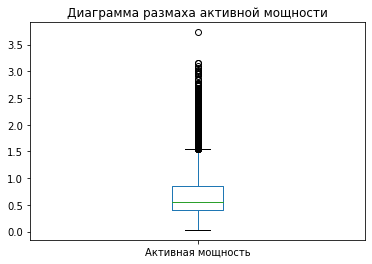

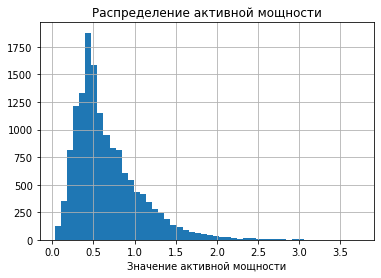

count    14876.000000
mean         0.670441
std          0.408159
min          0.030002
25%          0.395297
50%          0.555517
75%          0.857034
max          3.731596
Name: Активная мощность, dtype: float64

In [4]:
data_arc['Активная мощность'].plot(kind='box', title = 'Диаграмма размаха активной мощности')                    
plt.show()
data_arc['Активная мощность'].hist(bins=50)
plt.title('Распределение активной мощности')
plt.xlabel('Значение активной мощности')
plt.show()
data_arc['Активная мощность'].describe()

ВЫВОД.

На графике "ящик с усами" заметен отдельно стоящий выброс значения активной мощности  со значением больше 3.5. Данные распределены нормально со смещением вправо.

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Понял. Кстати вот почему рекомендуют вместе смотреть и гистограму и боксплот: один хорошо показывает однородность данных, второй - выбросы. А вместе они сила)) Например так, как ниже. А о нормальности: верно, графический анализ чаще всего достаточен. Но для пущей уверенности можно глянуть тесты на нормальность. Вот здесь можно глянуть:<br>/www.statology.org/normality-test-python/    
    </p>
</div>

*Анализ реактивной мощности*

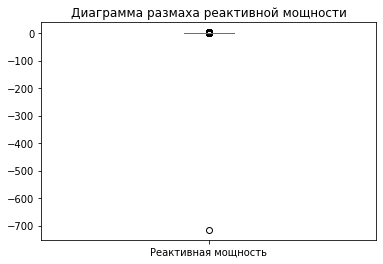

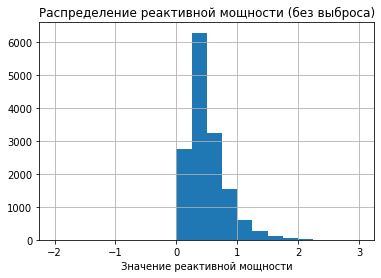

count    14876.000000
mean         0.452592
std          5.878702
min       -715.504924
25%          0.290991
50%          0.415962
75%          0.637371
max          2.676388
Name: Реактивная мощность, dtype: float64

In [5]:
data_arc['Реактивная мощность'].plot(kind='box', title = 'Диаграмма размаха реактивной мощности')                    
plt.show()
data_arc['Реактивная мощность'].hist(bins=20, range = (-2, 3))
plt.xlabel('Значение реактивной мощности')
plt.title('Распределение реактивной мощности (без выброса)')
plt.show()
data_arc['Реактивная мощность'].describe()

ВЫВОД.

На графике "ящик с усами" заметен отдельно стоящий выброс значения реактивной мощности со значением менее -715. Данные распределены нормально со смещением вправо.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ОК.А про нормальность - выше писал)</p>
</div>

**Анализ данных о газе**

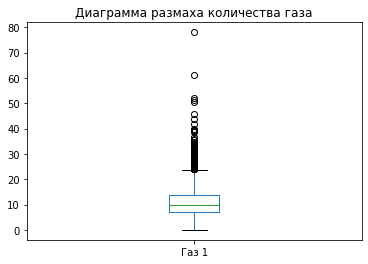

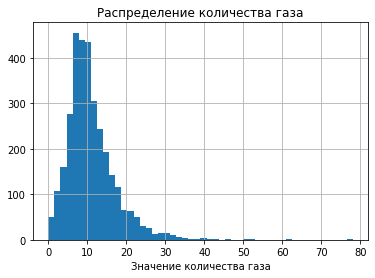

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Газ 1, dtype: float64

In [6]:
data_gas['Газ 1'].plot(kind='box', title = 'Диаграмма размаха количества газа')                    
plt.show()
data_gas['Газ 1'].hist(bins=50)
plt.title('Распределение количества газа')
plt.xlabel('Значение количества газа')
plt.show()
data_gas['Газ 1'].describe()

ВЫВОД.

На графике "ящик с усами" заметны два отдельно стоящих выброса значения количества газа со значениями более 60. Данные распределены нормально с небольшим смещением вправо.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>услышал</p>
</div>

**Анализ данных об объёме подаваемых сыпучих материалов**

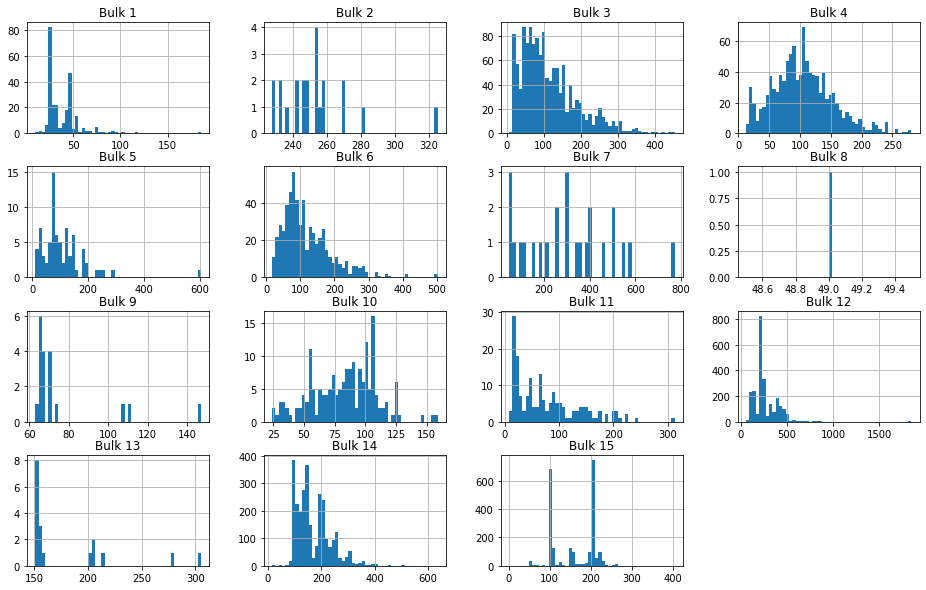

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [7]:
data_bulk.drop('key', axis=1).hist(bins=50, figsize=(16, 10))
plt.show()
data_bulk.drop('key', axis=1).describe()

ВЫВОД.

На графиках наблюдаются разнообразные распределения объёмов подаваемых сыпучих легирующих материалов, как нормальные, так и нет.

**Анализ данных об объёме подаваемых проволочных материалов**

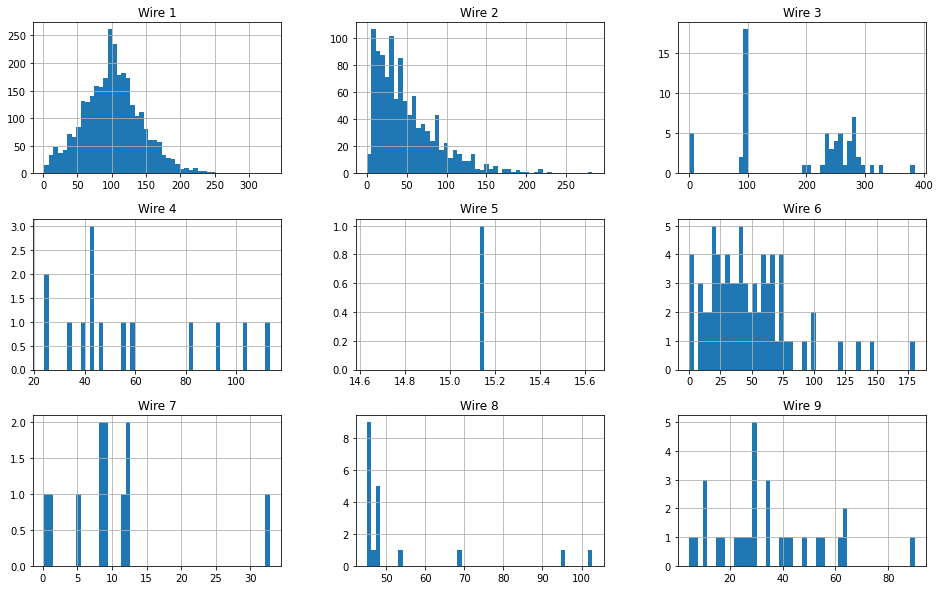

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [8]:
data_wire.drop('key', axis=1).hist(bins=50, figsize=(16, 10))
plt.show()
data_wire.drop('key', axis=1).describe()

ВЫВОД.

На графиках наблюдаются разнообразные распределения объёмов подаваемых проволочных легирующих материалов, как нормальные, так и нет.

**Анализ данных об измеренных значениях температуры**

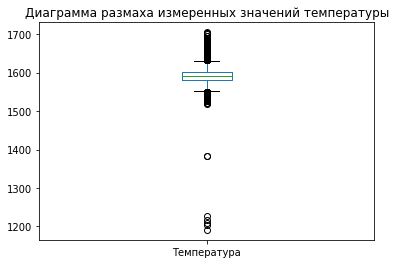

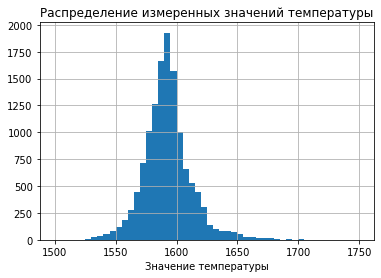

count    13006.000000
mean      1591.840920
std         21.375851
min       1191.000000
25%       1581.000000
50%       1591.000000
75%       1601.000000
max       1705.000000
Name: Температура, dtype: float64

In [9]:
data_temp['Температура'].plot(kind='box', title = 'Диаграмма размаха измеренных значений температуры')                    
plt.show()
data_temp['Температура'].hist(bins=50, range = (1500, 1750))
plt.title('Распределение измеренных значений температуры')
plt.xlabel('Значение температуры')
plt.show()
data_temp['Температура'].describe()

ВЫВОД.

На графике "ящик с усами" заметны отдельно стоящие выбросы со значениями температуры менее 1400. Данные распределены нормально.

**ОБЩИЙ ВЫВОД ПО ПУНКТУ**

Проведён исследовательский анализ данных: выведены описательные характеристики и проведён графический анализ данных. Принято решение относительно заполнения пропусков в данных.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Аааа, вот выводы по анализу. ОК<br>
    
Оставлю комментарий по выбросам ещё. С ними тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действительно кажется очень странным значением. А 1450 и выше выглядит вполне рабочим, не смотря на статистические границы.<br><br>
    
По выбросам в этом проекте:: супервыбросы убираем со всей выборки (реактивная мощность и температура менее 1400). А вот если другие выбросы будешь удалять (я бы не удалял), то давай условимся так: сделаем это только на трайн выборке. А тест будет чистая от удаления. Так мы будем близки к реальным условиям.<br>
Ведь если мы удаляем выбросы, а это не выбросы, то модель становится рабочей только на ограниченно диапазоне параметров. Т.е. мы добъёмся хорошей метрики. Но модель при этом буде малопригодной)

**ПЛАН РАБОТЫ ПО ВСЕМУ ПРОЕКТУ**

1. Подсчёт общей затраченной мощности для каждой партии
2. Заполнение пропусков в датафреймах `data_bulk` и `data_wire`, удаление выбросов, создание столбца "Редко используемые присадки" 
3. Нахождение первого и последнего (целевого) измерения температуры с помощью drop_duplicates(keep='first/last') с занесением их в отдельный датафрейм
4. Удаление строк с выбросами в таблицах
5. Создание итогового датафрейма с признаками и целевым признаком путём объединения данных из нескольких таблиц
6. Проверка на мультиколлинеарность
7. Создание трёх моделей для задачи регрессии, их анализ, выбор наилучшей, её тестирование
8. Анализ важности факторов у модели-победителя

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
С планом - ОК. Сюда же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя).

<div class="alert alert-info"> <b>Комментарий студента:</b> добавлю проверку, спасибо за советы :)  </div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>))</p>
</div>

**ВОПРОСЫ**

1. Вопрос по созданию столбца "Редко используемые присадки". Хотела все bulk'и с большим количеством пропусков объединить в один столбец (т.е. все кроме 12, 14 и 15). Но у оставшихся 12, 14 и 15 присадок не особо равномерное распределение, насколько правильно их оставлять? То же самое про wire, хотела все столбцы, кроме wire 1 собрать в один. Насколько правилен такой подход?
2. Надо ли учитывать выбросы в количестве присадок? Например, ограничившись 5 и 95 квартилем? А то там такие непонятные распределения количества, может, так и получается, что сильно меняются количества подаваемых веществ и надо оставить? Если же надо ограничить, то делать это и на train выборке и на test выборке? Помню, что на вебинаре был совет про температуру, что супер выбросы удалить везде, а ограничения по квартилям сделать только на train. С количеством присадок также поступать?

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
1) Если принципиально, то тут принимает решение сам аналитик. Могу высказать только свою позицию:
Да, такой вариант вполне рабочий.  Не могу найти противоречий.<br>
2) Супервыбросы пореактивной и температуры - из всёй выборки удаляем. А вот остальные - написал выше как раз.<br>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Наталья, с первичным анализом - понятно. Есть и аналитика, и графика, и выводы!! Это верно.<br>
<br>
С планом - написал выше, в него же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя).<br>
Что ж, тогда вперёд к моделированию)<br>
Если возникнут ещё вопросы - всегда в чате сможем встретиться.

<div class="alert alert-info"> <b>Комментарий студента:</b> попробовала учесть все советы в коде ниже  </div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>хорошо, пошёл)</p>
</div>

## Предобработка данных и создание итоговой таблицы с признаками

**Создание столбца с полной мощностью**

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Переписала код с удалением выбросов, удаляла всю партию, в которой есть выброс (подглядела в учебном чате). И ещё просто почистила код немного  </div>

In [10]:
# удаление партий с выбросами

# получение списка партий, для которых есть выбросы в столбце реактивной мощности

key_arc_del = data_arc[data_arc['Реактивная мощность'] < 0]['key'].unique()

# фильтрование таблицы data_arc

data_arc = data_arc.query('key not in @key_arc_del')

In [11]:
# создание итоговой таблицы с признаками itog_data

itog_data = pd.DataFrame(data_arc['key'])

In [12]:
# добавление столбца с полной мощностью

itog_data['Полная мощность'] = (data_arc['Активная мощность'] ** 2 + data_arc['Реактивная мощность'] ** 2) ** 0.5
itog_data = pd.DataFrame(itog_data.groupby('key')['Полная мощность'].sum())

<div class="alert alert-info"> <b>Комментарий студента:</b> Я также пробовала заменить полную мощность на работу по формуле А = Рt или на сочетание полной мощности и времени в секундах, но это тоже не улучшило метрику. </div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>понял</p>
</div>

**Добавление столбца с данными о продувке сплава газом**

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
С выбросами тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 и выше выглядит вполне рабочим, не смотря на статистические границы.<br><br>
    
По выбросам в этом проекте:: супервыбросы убираем со всей выборки (реактивная и температура менее 1400). А вот если другие выбросы будешь удалять (я бы не удалял), то давай условимся так: сделаем это только на трайн выборке. А тест будет чистая от удаления. Так мы будем близки к реальным условиям.<br>
Ведь если мы удаляем выбросы, а это не выбросы, то модель становится рабочей только на ограниченно диапазоне парамеров. Т.е. мы добъёмся хорошей метрики. Но модель при этом буде малопригодной)

<div class="alert alert-info"> <b>Комментарий студента 2:</b> перечитала ещё раз, разобралась до конца и удалила удаление выбросов :)</div>

In [13]:
# проверка на дубликаты в столбце key

data_gas['key'].duplicated().sum()

0

In [14]:
# добавление столбца в итоговую таблицу

itog_data = itog_data.merge(right=data_gas, how='inner', on='key')

**Добавление столбца с начальной и конечной температурами для каждой партии**

<div class="alert alert-info"> <b>Комментарий студента 2:</b> переписала код для удаления партий с выбросами </div>

In [15]:
# удаление партий с выбросами

# получение списка партий, для которых есть выбросы в столбце температур

data_temp = data_temp.fillna(0)
key_temp_del = data_temp[data_temp['Температура'] < 1400]['key'].unique()

# фильтрование таблицы data_temp

data_temp = data_temp.query('key not in @key_temp_del')

In [16]:
# нахождение начальной и конечной температур для каждой партии

data_temp_initial = data_temp.drop_duplicates('key')
data_temp_final = data_temp.drop_duplicates('key', keep='last')

# добавление столбцов в itog_data

itog_data = itog_data.merge(right=data_temp_initial[['key', 'Температура']], how='inner', on='key')
itog_data = itog_data.merge(right=data_temp_final[['key', 'Температура']], how='inner', on='key', 
                            suffixes=(' начальная', ' конечная'))

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Вот тут момент есть: объект моделирования - ковш. Поэтому, если у ковша нет целевой - надо удалять такие ковши. Сейчас они не удалены. И на их месте стоят строки, где первая температура  равна последней. Скорее всего и метрика тут так себе из-за этого!</p>
</div>

**Добавление столбцов "Вulk"** 

<div class="alert alert-info"> <b>Комментарий студента:</b> Я пробовала сделать столбцы с редкими присадками, но метрика при этом падала. Поэтому решила удалить их и использовать все признаки. Удалила несколько из тех пар, которые сильно коррелируют.</div>

In [17]:
# проверка на дубликаты в столбце key

data_bulk['key'].duplicated().sum()

0

In [18]:
# заполнение пропусков и добавление столбцов

data_bulk = data_bulk.fillna(0)
itog_data = itog_data.merge(right=data_bulk, how='inner', on='key')

**Добавление столбцов "Wire"**

In [19]:
# проверка на дубликаты в столбце key

data_bulk['key'].duplicated().sum()

0

In [20]:
# заполнение пропусков 

data_wire = data_wire.fillna(0)
itog_data = itog_data.merge(right=data_wire, how='inner', on='key')

**Анализ итоговой таблицы признаков**

,key,Полная мощность,Газ 1,Температура начальная,Температура конечная,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,...,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,5.826395,29.749986,1571.0,1613.0,0.0,0.0,0.0,43.0,0.0,...,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3.649216,12.555561,1581.0,1602.0,0.0,0.0,0.0,73.0,0.0,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2.989534,28.554793,1596.0,1599.0,0.0,0.0,0.0,34.0,0.0,...,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.814962,18.841219,1601.0,1625.0,0.0,0.0,0.0,81.0,0.0,...,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,4.035758,5.413692,1576.0,1602.0,0.0,0.0,0.0,78.0,0.0,...,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2495,3.986869,7.125735,1570.0,1591.0,0.0,0.0,21.0,0.0,0.0,...,223.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2320,2496,5.057033,9.412616,1554.0,1591.0,0.0,0.0,0.0,63.0,0.0,...,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2321,2497,2.885017,6.271699,1571.0,1589.0,0.0,0.0,0.0,85.0,0.0,...,226.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2322,2498,4.143749,14.953657,1591.0,1594.0,0.0,0.0,90.0,0.0,0.0,...,207.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   key                    2324 non-null   int64  
 1   Полная мощность        2324 non-null   float64
 2   Газ 1                  2324 non-null   float64
 3   Температура начальная  2324 non-null   float64
 4   Температура конечная   2324 non-null   float64
 5   Bulk 1                 2324 non-null   float64
 6   Bulk 2                 2324 non-null   float64
 7   Bulk 3                 2324 non-null   float64
 8   Bulk 4                 2324 non-null   float64
 9   Bulk 5                 2324 non-null   float64
 10  Bulk 6                 2324 non-null   float64
 11  Bulk 7                 2324 non-null   float64
 12  Bulk 8                 2324 non-null   float64
 13  Bulk 9                 2324 non-null   float64
 14  Bulk 10                2324 non-null   float64
 15  Bul

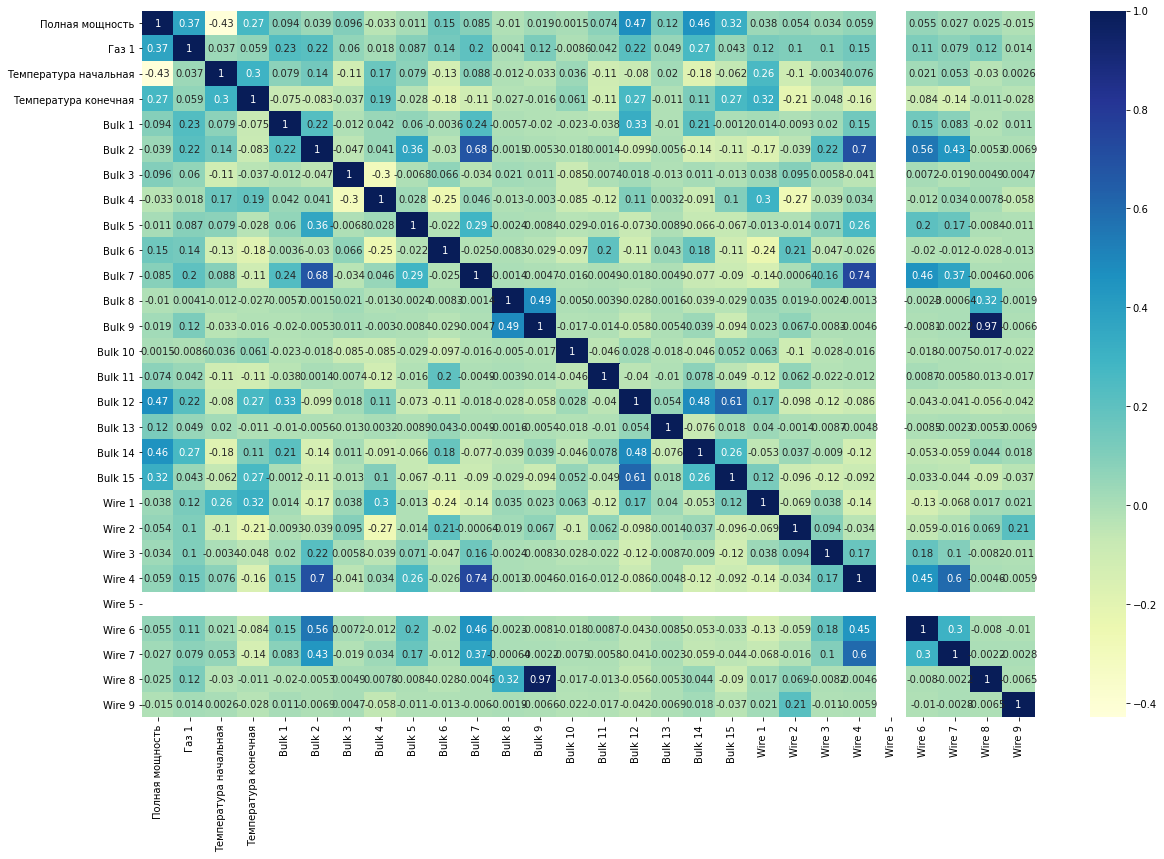

In [21]:
display(itog_data)
print()
print(itog_data.info())

# проверка данных мультиколлинеарность

fig, ax = plt.subplots(figsize=(20, 13))
sns.heatmap(itog_data.drop(['key'], axis=1).corr(), cmap="YlGnBu", annot=True)
plt.show()

In [22]:
# проверка значений столбца Wire 5

itog_data['Wire 5'].unique()

array([0.])

<div class="alert alert-info"> <b>Комментарий студента 2:</b> добавила вывод </div>

ВЫВОД.

На тепловой карте корреляции признаков наблюдаются признаки с высоким значением коэффициента корреляции  (Bulk 7 и Bulk 2: 0.68, Wire 4 и Bulk 2: 0.7, Wire 4 и Bulk 7: 0.74, Wire 8 и Bulk 9: 0.97), а также отсутствие значений, отличных от нуля, для столбца Wire 5.

**ОБЩИЙ ВЫВОД ПО ПУНКТУ**

Проведена предобработка данных: заполнены пропуски в данных, удалены выбросы. Создана таблица с итоговыми признаками путём объединения имеющихся данных из имеющихся таблиц, а также рассчитаны некоторые новые признаки.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>ОК</p>
</div>

## Создание моделей, их анализ и выбор наилучшей модели

Перед нами стоит задача регрессии, будут проанализированы три модели:
- случайный лес 
- CatBoost
- LightGBM

**Разбиение на обучающую и тестовую выборки**

In [23]:
features = itog_data.drop(['key', 'Температура конечная', 'Bulk 2', 'Bulk 7', 'Wire 8'], axis=1)
target = itog_data['Температура конечная']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=100423)

**Масштабирование количественных признаков**

In [24]:
pd.options.mode.chained_assignment = None

numeric = features_train.columns

scaler = StandardScaler()

features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

**СЛУЧАЙНЫЙ ЛЕС**

In [26]:
parameters = {'n_estimators': range(10, 41, 2), 'max_depth': range(1, 10)}
model_rf = RandomForestRegressor(random_state=100423)
tree_grid = GridSearchCV(model_rf, parameters, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=False)
tree_grid.fit(features_train, target_train)

cv_data = pd.DataFrame(tree_grid.cv_results_)
best_value = -1 * np.max(cv_data['mean_test_score'])
best_iter = np.argmax(cv_data['mean_test_score'])
print('Наилучшее значение метрики МАЕ: {:.2f} при параметрах {}'.format(
best_value, cv_data['params'][best_iter]))

Наилучшее значение метрики МАЕ: 6.13 при параметрах {'max_depth': 9, 'n_estimators': 38}


**МОДЕЛЬ CatBoost**

In [27]:
parameters = {'iterations': range(50, 120, 4)}
model_cb = CatBoostRegressor() 
cb_grid = GridSearchCV(model_cb, parameters, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=False)
cb_grid.fit(features_train, target_train, verbose=False)

cv_data = pd.DataFrame(cb_grid.cv_results_)
best_value_cb = -1 * cb_grid.best_score_
best_iter = np.argmax(cv_data['mean_test_score'])
print('Наилучшее значение метрики МАЕ: {:.2f} при параметрах {}'.format(
best_value_cb, cv_data['params'][best_iter]))

Наилучшее значение метрики МАЕ: 6.12 при параметрах {'iterations': 78}


**МОДЕЛЬ LightGBM**

In [28]:
parameters = {'n_estimators': range(50, 150, 5), 'max_depth': range(1, 15)}
model_l= lgb.LGBMRegressor()
l_grid = GridSearchCV(model_l, parameters, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=10)
l_grid.fit(features_train, target_train)

cv_data = pd.DataFrame(l_grid.cv_results_)
best_value_l = -1 * l_grid.best_score_
best_iter = np.argmax(cv_data['mean_test_score'])
print('Наилучшее значение метрики МАЕ: {:.2f} при параметрах {}'.format(
best_value_l, cv_data['params'][best_iter]))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10; 1/4] START max_depth=6, n_estimators=60...............................
[CV 1/10; 1/4] END .............max_depth=6, n_estimators=60; total time= 1.6min
[CV 2/10; 1/4] START max_depth=6, n_estimators=60...............................
[CV 2/10; 1/4] END .............max_depth=6, n_estimators=60; total time= 2.1min
[CV 3/10; 1/4] START max_depth=6, n_estimators=60...............................
[CV 3/10; 1/4] END .............max_depth=6, n_estimators=60; total time= 2.1min
[CV 4/10; 1/4] START max_depth=6, n_estimators=60...............................
[CV 4/10; 1/4] END .............max_depth=6, n_estimators=60; total time= 2.0min
[CV 5/10; 1/4] START max_depth=6, n_estimators=60...............................
[CV 5/10; 1/4] END .............max_depth=6, n_estimators=60; total time= 1.9min
[CV 6/10; 1/4] START max_depth=6, n_estimators=60...............................
[CV 6/10; 1/4] END .............max_depth=6, n_e

KeyboardInterrupt: 

ВЫВОД.

Наиболее точной моделью является модель LightGBM, значение метрики МАЕ равно 6.02 при параметрах 'max_depth': 6 и 'n_estimators': 65.

<div class="alert alert-info"> <b>Комментарий студента 2:</b> добавила вывод и тестирование</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Хорошо, Наталья! Вроде всё хорошо получается! И модельная часть интересная. А метрика не выбивается из-за подготовки данных к моделировании, там сложный момент, связанный с определением объекта моделирования. Постарался написать аргументацию и пояснение - посмотри, пожалуйста. Ну и анализ важности нам тут ещё нужен на тестовой модели.</p>
</div>

## Тестирование наилучшей модели

In [29]:
model_l= lgb.LGBMRegressor(max_depth=6, n_estimators=65)
model_l.fit(features_train, target_train)

print('Значение метрики МАЕ на тестовой выборке: {:.2f}'.\
      format(mean_absolute_error(model_l.predict(features_test), target_test)))

Значение метрики МАЕ на тестовой выборке: 5.98


**Оценка важности признаков**

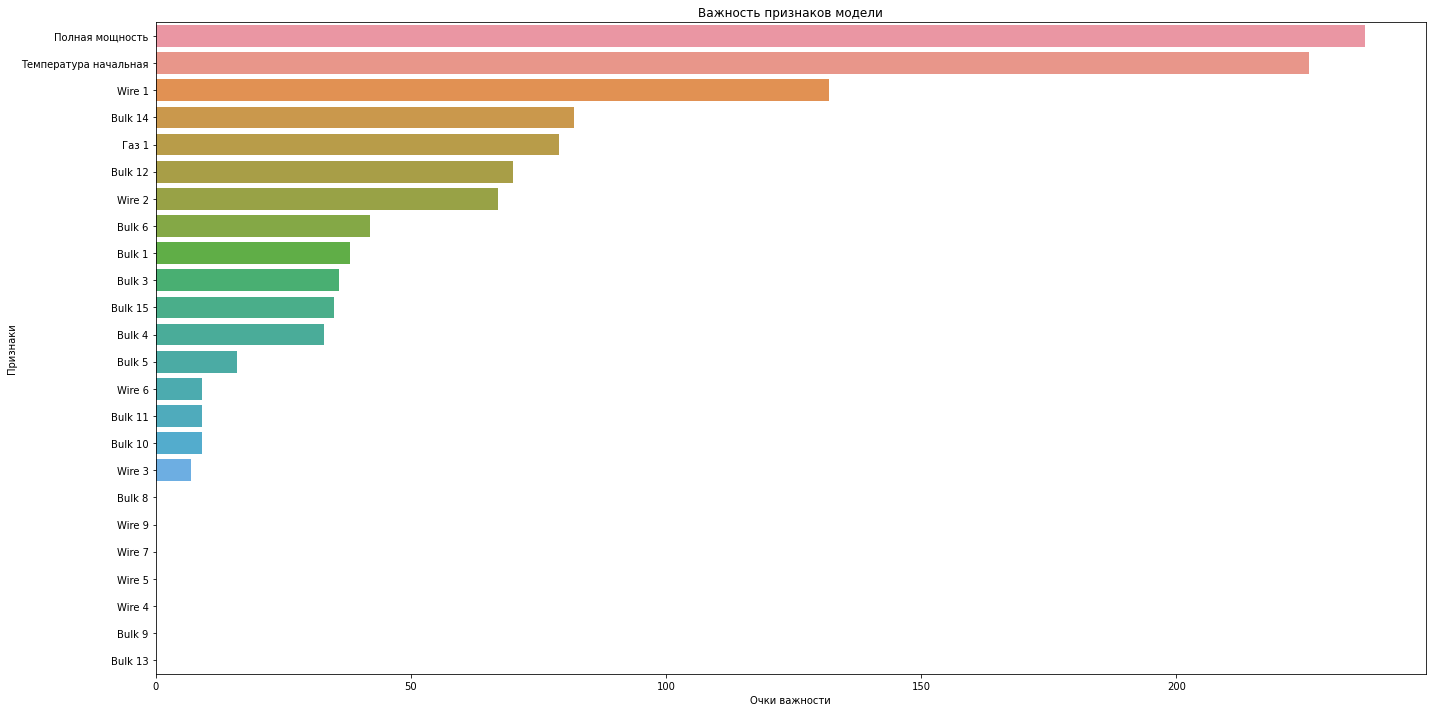

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(model_l.feature_importances_,features_test.columns)), 
                           columns=['Очки важности','Признаки'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Очки важности", y="Признаки", data=feature_imp.sort_values(by="Очки важности", ascending=False))
plt.title('Важность признаков модели')
plt.tight_layout()
plt.show()

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>хорошо, что используешь этот инструмент. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта"). И этот баллст можно исключить и перестроить модель. Метрика не должна силно измениться. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
ОК, Наталья, можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br> Увидел твои комментари/коорректировки. ОК.<br>
 
Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
Это было отступление)<br>    
Тогда впереди только отчёт. Что для него важно - оставлял в презентации. <br>
БУДУ ЖДАТЬ! <br>

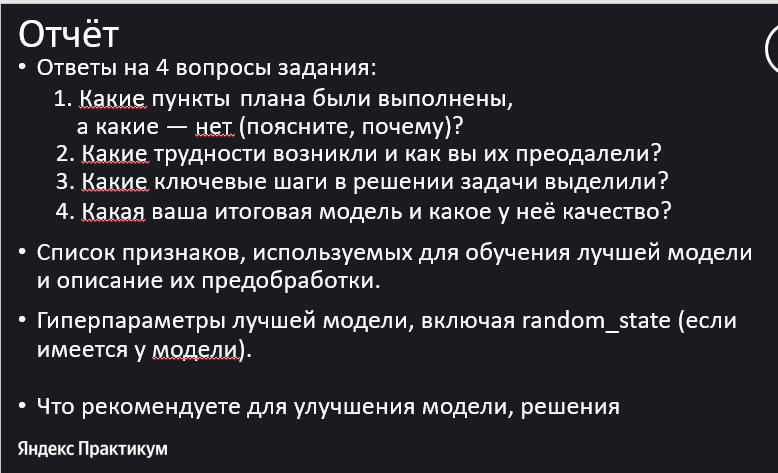